
# Data Science Part Time Course - Sydney 
## Natural Language Processing (NLP)

This notebook contains exercises for getting started with Natual Language Processing in Python. The main topics we will cover in this class are:

Introduction
1. newsgroups dataset
- Bag of words prediciton model

Advanced Language Processing with NLTK 
1. Tokenizing
- Stemming
- Speech Tagging
- Named Entity Recognition
- Term Frequency - Inverse Document Frequency
- Latent Dirichlet Allocation
- Regex

## Bag of Words Prediction

We will use the [20 Newsgroup dataset](http://qwone.com/~jason/20Newsgroups/), which is provided by Scikit-Learn. This is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. The 20 newsgroups collection has become a popular data set for experiments in text applications of machine learning techniques, such as text classification and text clustering.

We will restrict the analysis to 4 groups and will attempt to classify them starting from the corresponding text.

This is a typical example of text classification, where a data scientist's task is to train a model that can partition text in pre-defined categories. Other examples include sentiment analysis and topic assignment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_20newsgroups

In [3]:
# 4 (of 20 available) categories of news articles to download
categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]

# retrieve the prepared train data
data_train = fetch_20newsgroups(subset='train', categories=categories,
                                shuffle=True, random_state=42,
                                remove=('headers', 'footers', 'quotes'))

# retrieve the prepared test data
data_test = fetch_20newsgroups(subset='test', categories=categories,
                               shuffle=True, random_state=42,
                               remove=('headers', 'footers', 'quotes'))

## 1. Data inspection

We have downloaded a few newsgroup categories and removed headers, footers and quotes.

Let's inspect them.


Q: What data type is `data_train` ?

In [7]:
type(data_train)

sklearn.datasets.base.Bunch

Q: how to you retrieve the data?

In [ ]:
# use the .data method to retrive the data component form the train and test object
data_train.data

Q: Inspect the first data point, what does it look like?

In [8]:
data_train.data[1]

'\n\nSeems to be, barring evidence to the contrary, that Koresh was simply\nanother deranged fanatic who thought it neccessary to take a whole bunch of\nfolks with him, children and all, to satisfy his delusional mania. Jim\nJones, circa 1993.\n\n\nNope - fruitcakes like Koresh have been demonstrating such evil corruption\nfor centuries.'

## 2. Bag of Words model

Let's train a model using a simple count vectorizer

What is CountVectoriser? 
See the following documentation. It is for counting occurances of words.

[Text Feature Extraction](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)

Workflow we will follow:

1. Initialize a standard CountVectorizer and fit the training data (tokenization and occurrence counting)
- how big is the feature dictionary
- repeat eliminating english stop words
- is the dictionary smaller?
- transform the training data using the trained vectorizer
- what are the 20 words that are most common in the whole corpus?
- what are the 20 most common words in each of the 4 classes?
- evaluate the performance of a Logistic Regression on the features extracted by the CountVectorizer
    - you will have to transform the test_set too. Be carefule to use the trained vectorizer, without re-fitting it
- try the following 3 modification:
    - restrict the max_features
    - change max_df and min_df
    - use a fixed vocabulary of size 80 combining the 20 most common words per group found earlier
- for each of the above print a confusion matrix and investigate what gets mixed
- print out the number of features for each model

In [15]:
# Initialize a standard CountVectorizer and fit the training data (tokenization and occurrence counting)
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
# intialise CountVectorizer and fit on the dataset
cvec = CountVectorizer()
cvec.fit(data_train['data'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

Q: how big is the feature dictionary

In [17]:
len(cvec.get_feature_names())

26879

In [18]:
# repeat the fit process, this time eliminating english stop words
cvec = CountVectorizer(stop_words='english')
cvec.fit(data_train['data'])
len(cvec.get_feature_names())

26576

Q: is the dictionary smaller?

In [19]:
# transform the training data using the trained vectorizer
X_train = pd.DataFrame(cvec.transform(data_train['data']).todense(),
                       columns=cvec.get_feature_names())

In [20]:
y_train = data_train['target']

Q: what are the 20 words that are most common in the whole corpus?

In [21]:
word_counts = X_train.sum(axis=0)
word_counts.sort_values(ascending = False).head(20)

space       1061
people       793
god          745
don          730
like         682
just         675
does         600
know         592
think        584
time         546
image        534
edu          501
use          468
good         449
data         444
nasa         419
graphics     414
jesus        411
say          409
way          387
dtype: int64

In [23]:
# 4 target names
names = data_train['target_names']
names

['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']

In [26]:
# what are the 20 most common words in each of the 4 classes?

common_words = []
for i in range(4):
    word_count = X_train[y_train==i].sum(axis=0)
    print(names[i], "most common words")
    cw = word_count.sort_values(ascending = False).head(20)
#     cw.to_csv('../../../5.2-lesson/assets/datasets/'+names[i]+'_most_common_words.csv')
    print(cw)
    common_words.extend(cw.index)
    print()

alt.atheism most common words
god         405
people      330
don         262
think       215
just        209
does        207
atheism     199
say         174
believe     163
like        162
atheists    162
religion    156
jesus       155
know        154
argument    148
time        135
said        131
true        131
bible       121
way         120
dtype: int64

comp.graphics most common words
image        484
graphics     410
edu          297
jpeg         267
file         265
use          225
data         219
files        217
images       212
software     212
program      199
ftp          189
available    185
format       178
color        174
like         167
know         165
pub          161
gif          160
does         157
dtype: int64

sci.space most common words
space        989
nasa         374
launch       267
earth        222
like         222
data         216
orbit        201
time         197
shuttle      192
just         189
satellite    187
lunar        182
moon         168
n

Evaluate the performance of a Logistic Regression on the features extracted by the CountVectorizer

In [27]:
X_test = pd.DataFrame(cvec.transform(data_test['data']).todense(),
                      columns=cvec.get_feature_names())

In [28]:
X_test = pd.DataFrame(cvec.transform(data_test['data']).todense(),
                      columns=cvec.get_feature_names())
y_test = data_test['target']

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.74501108647450109

try the following 3 modification:

- restrict the max_features
- change max_df and min_df
- use a fixed vocabulary of size 80 combining the 20 most common words per group found earlier

Restrict the max_features:

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [40]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(CountVectorizer(stop_words='english',
                                      max_features=1000),
                      LogisticRegression(),
                      )
model.fit(data_train['data'], y_train)
y_pred = model.predict(data_test['data'])
print(accuracy_score(y_test, y_pred))
docm(y_test, y_pred, names)
print("Number of features:", len(model.steps[0][1].get_feature_names()))

0.69696969697
Number of features: 1000


Print a confusion matrix and investigate what gets mixed

In [41]:
def docm(y_true, y_pred, labels=None):
    cm = confusion_matrix(y_true, y_pred)
    if labels is not None:
        cols = ['p_'+c for c in labels]
        df = pd.DataFrame(cm, index=labels, columns=cols)
    else:
        cols = ['p_'+str(i) for i in xrange(len(cm))]
        df = pd.DataFrame(cm, columns=cols)
    return df

In [42]:
docm(y_test, y_pred, names)

,p_alt.atheism,p_comp.graphics,p_sci.space,p_talk.religion.misc
alt.atheism,172,15,59,73
comp.graphics,16,331,36,6
sci.space,28,29,312,25
talk.religion.misc,76,16,31,128


Change max_df and min_df:

In [36]:
model = make_pipeline(CountVectorizer(stop_words='english',
                                      max_features=2000,
                                      min_df=0.01),
                      LogisticRegression(),
                      )
model.fit(data_train['data'], y_train)
y_pred = model.predict(data_test['data'])
print(accuracy_score(y_test, y_pred))
docm(y_test, y_pred, names)
print("Number of features:", len(model.steps[0][1].get_feature_names()))

0.70436067997
Number of features: 1258


In [37]:
docm(y_test, y_pred, names)

,p_alt.atheism,p_comp.graphics,p_sci.space,p_talk.religion.misc
alt.atheism,167,15,58,79
comp.graphics,14,328,39,8
sci.space,23,26,320,25
talk.religion.misc,68,18,27,138


Use a fixed vocabulary of size 80 combining the 20 most common words per group found earlier

In [45]:
model = make_pipeline(CountVectorizer(stop_words='english',
                                      vocabulary=set(common_words)),
                      LogisticRegression(),
                      )
model.fit(data_train['data'], y_train)
y_pred = model.predict(data_test['data'])
print(accuracy_score(y_test, y_pred))
docm(y_test, y_pred, names)
print("Number of features:", len(model.steps[0][1].get_feature_names()))

0.589061345159
Number of features: 54


In [46]:
docm(y_test, y_pred, names)

,p_alt.atheism,p_comp.graphics,p_sci.space,p_talk.religion.misc
alt.atheism,160,67,33,59
comp.graphics,25,314,44,6
sci.space,37,88,247,22
talk.religion.misc,90,70,15,76


# Natural Language Processing with NLTK

In [47]:
import nltk

If you have not downloaded NLTK, use the following method to download just the essentials:

For the following step, see the new window that will pop out elsewhere. The whole NLTK package is huge. Too big for all of you to download in class at the same time. Instead, select to install just the main packages and see of the lab runs. If not, use the downloader to get the additional missing packages.

In [49]:
# find pop-up window for downloader tool
#nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### Tokenization

What:  Separate text into units such as sentences or words

Why:   Gives structure to previously unstructured text

Notes: Relatively easy with English language text, not easy with some languages


"corpus" = collection of documents

"corpora" = plural form of corpus


In [50]:
import requests
from bs4 import BeautifulSoup

r = requests.get("http://en.wikipedia.org/wiki/Data_science")
b = BeautifulSoup(r.text, "lxml")
paragraphs = b.find("body").findAll("p")
text = ""
for paragraph in paragraphs:
    text += paragraph.text + " "
# Data Science corpus
text[:500]

'Data science, also known as data-driven science, is an interdisciplinary field about scientific methods, processes, and systems to extract knowledge or insights from data in various forms, either structured or unstructured,[1][2] similar to data mining. Data science is a "concept to unify statistics, data analysis and their related methods" in order to "understand and analyze actual phenomena" with data.[3] It employs techniques and theories drawn from many fields within the broad areas of mathe'

In [51]:
# tokenize into sentences
sentences = [sent for sent in nltk.sent_tokenize(text)]
sentences[:10]


['Data science, also known as data-driven science, is an interdisciplinary field about scientific methods, processes, and systems to extract knowledge or insights from data in various forms, either structured or unstructured,[1][2] similar to data mining.',
 'Data science is a "concept to unify statistics, data analysis and their related methods" in order to "understand and analyze actual phenomena" with data.',
 '[3] It employs techniques and theories drawn from many fields within the broad areas of mathematics, statistics, information science, and computer science, in particular from the subdomains of machine learning, classification, cluster analysis, data mining, databases, and visualization.',
 'Turing award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational and now data-driven) and asserted that "everything about science is changing because of the impact of information technology" and the data deluge.',
 '[4][5] When Har

In [52]:
# tokenize into words
tokens = [word for word in nltk.word_tokenize(text)]
tokens[:100]

['Data',
 'science',
 ',',
 'also',
 'known',
 'as',
 'data-driven',
 'science',
 ',',
 'is',
 'an',
 'interdisciplinary',
 'field',
 'about',
 'scientific',
 'methods',
 ',',
 'processes',
 ',',
 'and',
 'systems',
 'to',
 'extract',
 'knowledge',
 'or',
 'insights',
 'from',
 'data',
 'in',
 'various',
 'forms',
 ',',
 'either',
 'structured',
 'or',
 'unstructured',
 ',',
 '[',
 '1',
 ']',
 '[',
 '2',
 ']',
 'similar',
 'to',
 'data',
 'mining',
 '.',
 'Data',
 'science',
 'is',
 'a',
 '``',
 'concept',
 'to',
 'unify',
 'statistics',
 ',',
 'data',
 'analysis',
 'and',
 'their',
 'related',
 'methods',
 "''",
 'in',
 'order',
 'to',
 '``',
 'understand',
 'and',
 'analyze',
 'actual',
 'phenomena',
 "''",
 'with',
 'data',
 '.',
 '[',
 '3',
 ']',
 'It',
 'employs',
 'techniques',
 'and',
 'theories',
 'drawn',
 'from',
 'many',
 'fields',
 'within',
 'the',
 'broad',
 'areas',
 'of',
 'mathematics',
 ',',
 'statistics',
 ',',
 'information']

In [53]:
# only keep tokens that start with a letter (using regular expressions)
import re
clean_tokens = [token for token in tokens if re.search('^[a-zA-Z]+', token)]
clean_tokens[:100]


['Data',
 'science',
 'also',
 'known',
 'as',
 'data-driven',
 'science',
 'is',
 'an',
 'interdisciplinary',
 'field',
 'about',
 'scientific',
 'methods',
 'processes',
 'and',
 'systems',
 'to',
 'extract',
 'knowledge',
 'or',
 'insights',
 'from',
 'data',
 'in',
 'various',
 'forms',
 'either',
 'structured',
 'or',
 'unstructured',
 'similar',
 'to',
 'data',
 'mining',
 'Data',
 'science',
 'is',
 'a',
 'concept',
 'to',
 'unify',
 'statistics',
 'data',
 'analysis',
 'and',
 'their',
 'related',
 'methods',
 'in',
 'order',
 'to',
 'understand',
 'and',
 'analyze',
 'actual',
 'phenomena',
 'with',
 'data',
 'It',
 'employs',
 'techniques',
 'and',
 'theories',
 'drawn',
 'from',
 'many',
 'fields',
 'within',
 'the',
 'broad',
 'areas',
 'of',
 'mathematics',
 'statistics',
 'information',
 'science',
 'and',
 'computer',
 'science',
 'in',
 'particular',
 'from',
 'the',
 'subdomains',
 'of',
 'machine',
 'learning',
 'classification',
 'cluster',
 'analysis',
 'data',
 'mi

In [54]:
# count the tokens
from collections import Counter
c = Counter(clean_tokens)

c.most_common(25)       # mixed case

[('the', 59),
 ('and', 57),
 ('data', 45),
 ('of', 45),
 ('in', 27),
 ('science', 26),
 ('Data', 25),
 ('a', 25),
 ('to', 23),
 ('In', 17),
 ('Science', 16),
 ('for', 13),
 ('is', 12),
 ('term', 12),
 ('as', 11),
 ('The', 10),
 ('on', 10),
 ('was', 8),
 ('Statistical', 8),
 ('with', 7),
 ('his', 7),
 ('software', 7),
 ('methods', 6),
 ('statistics', 6),
 ('their', 6)]

In [59]:
sorted(c.items())[:25]  # counts similar words separately

#print
for item in sorted(c.items())[:25]:
    print(item[0], item[1])

ASA 1
Action 1
Advanced 2
Although 1
American 2
An 1
Analysis 2
Analytics 3
April 2
Areas 1
Assembly 1
Association 3
August 1
Because 1
Board 1
Business 3
C. 1
C.F 1
CODATA 1
Carver 1
Century 4
Chandra 1
Chikio 1
Classification 1
Cleveland 2


###################
##### EXERCISE ####
###################

- Put each word in clean_tokens in lower case
- find the new word count of the lowered tokens
- Then show the top 10 words used in this corpus


In [64]:
# Put each word in clean_tokens in lower case
clean_tokens_lower = [token.lower() for token in clean_tokens]
clean_tokens_lower

In [65]:
# find the new word count of the lowered tokens
c = Counter(clean_tokens_lower)
sorted(c.items())[:25]  # counts similar words separately

[('a', 25),
 ('ability', 1),
 ('about', 2),
 ('academics', 1),
 ('action', 1),
 ('activity', 1),
 ('actual', 1),
 ('added', 1),
 ('address', 1),
 ('advanced', 2),
 ('advances', 1),
 ('advocacy', 1),
 ('advocated', 1),
 ('after', 1),
 ('aid', 1),
 ('algorithms', 1),
 ('all', 1),
 ('allows', 1),
 ('also', 2),
 ('although', 1),
 ('american', 2),
 ('amounts', 1),
 ('an', 5),
 ('analysis', 7),
 ('analytical', 1)]

In [67]:
# Then show the top 10 words used in this corpus
c.most_common(10)  

[('data', 70),
 ('the', 69),
 ('and', 57),
 ('of', 45),
 ('in', 44),
 ('science', 42),
 ('a', 25),
 ('to', 23),
 ('for', 13),
 ('is', 12)]

### Stemming
What:  Reduce a word to its base/stem form

Why:   Often makes sense to treat multiple word forms the same way

Notes: 

- Uses a "simple" and fast rule-based approach
- Output can be undesirable for irregular words
- Stemmed words are usually not shown to users (used for analysis/indexing)
- Some search engines treat words with the same stem as synonyms

In [68]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')


In [69]:
# example stemming
stemmer.stem('charge')
stemmer.stem('charging')
stemmer.stem('charged')

'charg'

In [70]:
# stem the tokens
stemmed_tokens = [stemmer.stem(t) for t in clean_tokens]


In [71]:
# count the stemmed tokens
c = Counter(stemmed_tokens)
c.most_common(25)       # all lowercase
sorted(c.items())[:25]  # some are strange

[('a', 25),
 ('abil', 1),
 ('about', 2),
 ('academ', 1),
 ('action', 1),
 ('activ', 1),
 ('actual', 1),
 ('ad', 1),
 ('address', 1),
 ('advanc', 3),
 ('advoc', 1),
 ('advocaci', 1),
 ('after', 1),
 ('aid', 1),
 ('algorithm', 1),
 ('all', 1),
 ('allow', 1),
 ('also', 2),
 ('although', 1),
 ('american', 2),
 ('amount', 1),
 ('an', 5),
 ('analysi', 7),
 ('analyt', 6),
 ('analytics”', 1)]

### Lemmatization
What:  Derive the canonical form ('lemma') of a word
    
Why:   Can be better than stemming, reduces words to a 'normal' form.
    
Notes: Uses a dictionary-based approach (slower than stemming)
    

In [78]:
lemmatizer = nltk.WordNetLemmatizer()

##### compare stemmer to lemmatizer

'dogs'

In [81]:
# compare stemmer to lemmatizer
stemmer.stem('dogs')

'dog'

In [82]:
lemmatizer.lemmatize('dogs')

'dog'

'wolves'

In [84]:
stemmer.stem('wolves') # Beter for information retrieval and search

'wolv'

In [85]:
lemmatizer.lemmatize('wolves') # Better for text analysis

'wolf'

'is'

In [86]:
stemmer.stem('is')

'is'

In [87]:
lemmatizer.lemmatize('is')

'is'

In [88]:
lemmatizer.lemmatize('is',pos='v')

'be'

### Part of Speech Tagging

What:  Determine the part of speech of a word
    
Why:   This can inform other methods and models such as Named Entity Recognition
    
Notes: http://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [89]:
temp_sent = 'We have a revision class this Saturday'
# pos_tag takes a tokenize sentence
nltk.pos_tag(nltk.word_tokenize(temp_sent))

[('We', 'PRP'),
 ('have', 'VBP'),
 ('a', 'DT'),
 ('revision', 'NN'),
 ('class', 'NN'),
 ('this', 'DT'),
 ('Saturday', 'NNP')]

### Stopword Removal

What:  Remove common words that will likely appear in any text
    
Why:   They don't tell you much about your text

In [90]:
# most of top 25 stemmed tokens are "worthless"
c.most_common(25)

[('data', 70),
 ('the', 69),
 ('and', 57),
 ('of', 45),
 ('in', 44),
 ('scienc', 42),
 ('a', 25),
 ('to', 23),
 ('statist', 19),
 ('for', 13),
 ('is', 12),
 ('term', 12),
 ('as', 11),
 ('scientist', 11),
 ('use', 10),
 ('on', 10),
 ('it', 8),
 ('was', 8),
 ('method', 7),
 ('analysi', 7),
 ('with', 7),
 ('comput', 7),
 ('his', 7),
 ('softwar', 7),
 ('their', 6)]

In [91]:
# view the list of stopwords
stopwords = nltk.corpus.stopwords.words('english')
sorted(stopwords)

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 'd',
 'did',
 'didn',
 'do',
 'does',
 'doesn',
 'doing',
 'don',
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 'has',
 'hasn',
 'have',
 'haven',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 'it',
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 'more',
 'most',
 'mustn',
 'my',
 'myself',
 'needn',
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'shan',
 'she',
 'should',
 'shouldn',
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 'the',
 'their',
 'theirs',
 'them',
 

##################
### Exercise  ####
##################


- Create a variable called stemmed_stops which is the stemmed version of each stopword in stopwords. Use the stemmer we used up above!
- Then create a list called stemmed_tokens_no_stop that contains only the tokens in stemmed_tokens that aren't in stemmed_stops
- Show the 25 most common stemmed non stop word tokens

In [92]:
# Create a variable called stemmed_stops which is the stemmed version of each stopword in stopwords
stopwords

In [96]:
stemmed_stops = [stemmer.stem(words) for words in stopwords]
stemmed_stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'our',
 'ourselv',
 'you',
 'your',
 'your',
 'yourself',
 'yourselv',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'her',
 'herself',
 'it',
 'it',
 'itself',
 'they',
 'them',
 'their',
 'their',
 'themselv',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'be',
 'have',
 'has',
 'had',
 'have',
 'do',
 'doe',
 'did',
 'do',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'becaus',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'dure',
 'befor',
 'after',
 'abov',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'onc',
 'here',
 'there',
 'when',
 'where',
 'whi',
 'how',
 'all',
 'ani',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 'not',
 'onli',
 'own',
 's

In [101]:
# create a list called stemmed_tokens_no_stop that contains only the tokens in stemmed_tokens that aren't in stemmed_stops
stemmed_tokens_no_stop = [stemmer.stem(words) for words in stemmed_tokens if words not in stemmed_stops]
stemmed_tokens_no_stop

['data',
 'scienc',
 'also',
 'known',
 'data-driven',
 'scienc',
 'interdisciplinari',
 'field',
 'scientif',
 'method',
 'process',
 'system',
 'extract',
 'knowledg',
 'insight',
 'data',
 'various',
 'form',
 'either',
 'structur',
 'unstructur',
 'similar',
 'data',
 'mine',
 'data',
 'scienc',
 'concept',
 'unifi',
 'statist',
 'data',
 'analysi',
 'relat',
 'method',
 'order',
 'understand',
 'analyz',
 'actual',
 'phenomena',
 'data',
 'employ',
 'techniqu',
 'theori',
 'drawn',
 'mani',
 'field',
 'within',
 'broad',
 'area',
 'mathemat',
 'statist',
 'inform',
 'scienc',
 'comput',
 'scienc',
 'particular',
 'subdomain',
 'machin',
 'learn',
 'classif',
 'cluster',
 'analysi',
 'data',
 'mine',
 'databa',
 'visual',
 'ture',
 'award',
 'winner',
 'jim',
 'gray',
 'imagin',
 'data',
 'scienc',
 'fourth',
 'paradigm',
 'scienc',
 'empir',
 'theoret',
 'comput',
 'data-driven',
 'assert',
 'everyth',
 'scienc',
 'chang',
 'impact',
 'inform',
 'technolog',
 'data',
 'delug',
 'h

In [100]:
# Show the 25 most common stemmed non stop word tokens

c = Counter(stemmed_tokens_no_stop)
c.most_common(25)

[('data', 70),
 ('scienc', 42),
 ('statist', 19),
 ('term', 12),
 ('scientist', 11),
 ('use', 10),
 ('method', 7),
 ('analysi', 7),
 ('comput', 7),
 ('intern', 7),
 ('softwar', 7),
 ('busi', 6),
 ('analyt', 6),
 ('confer', 6),
 ('journal', 6),
 ('field', 5),
 ('univ', 5),
 ('publish', 5),
 ('lectur', 5),
 ('statistician', 5),
 ('mine', 4),
 ('mani', 4),
 ('review', 4),
 ('job', 4),
 ('centuri', 4)]

### Named Entity Recognition

What:  Automatically extract the names of people, places, organizations, etc.

Why:   Can help you to identify "important" words

Notes: 

- Training NER classifier requires a lot of annotated training data
- Should be trained on data relevant to your task
- Stanford NER classifier is pretty good

In [103]:
sentence = 'Alasdair is an instructor for General Assembly'

tokenized = nltk.word_tokenize(sentence)

tokenized

['Alasdair', 'is', 'an', 'instructor', 'for', 'General', 'Assembly']

In [104]:
tagged = nltk.pos_tag(tokenized)

tagged


[('Alasdair', 'NNP'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('instructor', 'NN'),
 ('for', 'IN'),
 ('General', 'NNP'),
 ('Assembly', 'NNP')]

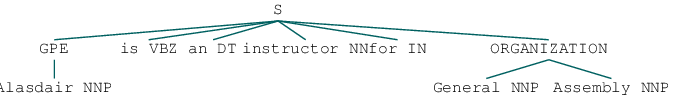

In [105]:
chunks = nltk.ne_chunk(tagged)

chunks


In [107]:
def extract_entities(text):
    entities = []
    # tokenize into sentences
    for sentence in nltk.sent_tokenize(text):
        # tokenize sentences into words
        # add part-of-speech tags
        # use NLTK's NER classifier
        chunks = nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sentence)))
        # parse the results
        entities.extend([chunk for chunk in chunks if hasattr(chunk, 'label')])
    return entities

for entity in extract_entities('Alasdair is an instructor for General Assembly'):
    print('[' + entity.label() + '] ' + ' '.join(c[0] for c in entity.leaves()))

[GPE] Alasdair
[ORGANIZATION] General Assembly


### Term Frequency - Inverse Document Frequency (TF-IDF)

What:  Computes "relative frequency" that a word appears in a document
           compared to its frequency across all documents

Why:   More useful than "term frequency" for identifying "important" words in
           each document (high frequency in that document, low frequency in
           other documents)

Notes: Used for search engine scoring, text summarization, document clustering

How: 
    - TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).
    - IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [108]:
sample = ['Bob likes sports', 'Bob hates sports', 'Bob likes likes trees']

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()


In [111]:
# Each row represents a sentence
# Each column represents a word
vect.fit_transform(sample).toarray()
vect.get_feature_names()


['bob', 'hates', 'likes', 'sports', 'trees']

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit_transform(sample).toarray()
tfidf.get_feature_names()


['bob', 'hates', 'likes', 'sports', 'trees']

In [114]:
# the IDF of each word
idf = tfidf.idf_
print(dict(list(zip(tfidf.get_feature_names(), idf))))

{'bob': 1.0, 'hates': 1.6931471805599454, 'likes': 1.2876820724517808, 'sports': 1.2876820724517808, 'trees': 1.6931471805599454}


###############
#### Exercise #####
###############


for each sentence in sample, find the most "interesting words" by ordering their tfidf in ascending order


In [128]:
sampleTFIDF = dict(list(zip(tfidf.get_feature_names(), idf)))
sampleTFIDF

{'bob': 1.0,
 'hates': 1.6931471805599454,
 'likes': 1.2876820724517808,
 'sports': 1.2876820724517808,
 'trees': 1.6931471805599454}

In [124]:
sorted(sampleTFIDF, key=sampleTFIDF.get)

['bob', 'likes', 'sports', 'hates', 'trees']

## Extra Time Demonstrations 

### LDA - Latent Dirichlet Allocation

What:  Way of automatically discovering topics from sentences

Why:   Much quicker than manually creating and identifying topic clusters

In [138]:
!pip install lda

    100% |████████████████████████████████| 389kB 800kB/s ta 0:00:01
    100% |████████████████████████████████| 102kB 1.4MB/s a 0:00:01


In [152]:
sentences[1:5]

['Data science is a "concept to unify statistics, data analysis and their related methods" in order to "understand and analyze actual phenomena" with data.',
 '[3] It employs techniques and theories drawn from many fields within the broad areas of mathematics, statistics, information science, and computer science, in particular from the subdomains of machine learning, classification, cluster analysis, data mining, databases, and visualization.',
 'Turing award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational and now data-driven) and asserted that "everything about science is changing because of the impact of information technology" and the data deluge.',
 '[4][5] When Harvard Business Review called it "The Sexiest Job of the 21st Century" [6] the term became a buzzword, and is now often applied to business analytics,[7] or even arbitrary use of data, or used as a sexed-up term for statistics.']

In [153]:
import lda

# Instantiate a count vectorizer with two additional parameters
vect = CountVectorizer(stop_words='english', ngram_range=[1,3]) 
sentences_train = vect.fit_transform(sentences)


In [154]:
# Instantiate an LDA model
model = lda.LDA(n_topics=10, n_iter=500)
model.fit(sentences_train) # Fit the model 
n_top_words = 10
topic_word = model.topic_word_
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vect.get_feature_names())[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}'.format(i, ', '.join(topic_words)))


INFO:lda:n_documents: 45
INFO:lda:vocab_size: 1749
INFO:lda:n_words: 2182
INFO:lda:n_topics: 10
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -25173
INFO:lda:<10> log likelihood: -21490
INFO:lda:<20> log likelihood: -21169
INFO:lda:<30> log likelihood: -20862
INFO:lda:<40> log likelihood: -20758
INFO:lda:<50> log likelihood: -20722
INFO:lda:<60> log likelihood: -20650
INFO:lda:<70> log likelihood: -20616
INFO:lda:<80> log likelihood: -20698
INFO:lda:<90> log likelihood: -20591
INFO:lda:<100> log likelihood: -20671
INFO:lda:<110> log likelihood: -20533
INFO:lda:<120> log likelihood: -20327
INFO:lda:<130> log likelihood: -20451
INFO:lda:<140> log likelihood: -20430
INFO:lda:<150> log likelihood: -20405
INFO:lda:<160> log likelihood: -20645
INFO:lda:<170> log likelihood: -20475
INFO:lda:<180> log likelihood: -20341
INFO:lda:<190> log likelihood: -20409
INFO:lda:<200> log likelihood: -20319
INFO:lda:<210> log likelihood: -20418
INFO:lda:<220> log likelihood: -20527
INFO:lda:<230> log l

Topic 0: programs, paid programs, use data, offering, paid, like, time, data sources, collection
Topic 1: data, science, data science, journal, university, data science journal, journal data science, degree, publication
Topic 2: business, scientist, data scientist, century, 21st, 21st century, use, term, job
Topic 3: field, areas, article, applications, extending, computing, computing data, 2001, article data
Topic 4: software, present, source, open source software, source software, open, started, current, open source
Topic 5: data, scientists, data scientists, information, data driven, insights, new, methods, data collection
Topic 6: analytics, conference, international, 2015, launched, conference data, science advanced analytics, science advanced, society
Topic 7: statistical, analysis, mining, data mining, section, association, classification, statistician, learning
Topic 8: statisticians, digital, produce, work, research, digital data, analysis, enabling research, statisticians nor

In [155]:
# EXAMPLE: Automatically summarize a document


# corpus of 2000 movie reviews
from nltk.corpus import movie_reviews
reviews = [movie_reviews.raw(filename) for filename in movie_reviews.fileids()]


In [159]:
reviews[1:5]

['the happy bastard\'s quick movie review \ndamn that y2k bug . \nit\'s got a head start in this movie starring jamie lee curtis and another baldwin brother ( william this time ) in a story regarding a crew of a tugboat that comes across a deserted russian tech ship that has a strangeness to it when they kick the power back on . \nlittle do they know the power within . . . \ngoing for the gore and bringing on a few action sequences here and there , virus still feels very empty , like a movie going for all flash and no substance . \nwe don\'t know why the crew was really out in the middle of nowhere , we don\'t know the origin of what took over the ship ( just that a big pink flashy thing hit the mir ) , and , of course , we don\'t know why donald sutherland is stumbling around drunkenly throughout . \nhere , it\'s just " hey , let\'s chase these people around with some robots " . \nthe acting is below average , even from the likes of curtis . \nyou\'re more likely to get a kick out of 

In [160]:
# create document-term matrix
tfidf = TfidfVectorizer(stop_words='english')
dtm = tfidf.fit_transform(reviews)
features = tfidf.get_feature_names()

In [161]:
import numpy as np


In [162]:
# find the most and least "interesting" sentences in a randomly selected review
def summarize():
    
    # choose a random movie review    
    review_id = np.random.randint(0, len(reviews))
    review_text = reviews[review_id]

    # we are going to score each sentence in the review for "interesting-ness"
    sent_scores = []
    # tokenize document into sentences
    for sentence in nltk.sent_tokenize(review_text):
        # exclude short sentences
        if len(sentence) > 6:
            score = 0
            token_count = 0
            # tokenize sentence into words
            tokens = nltk.word_tokenize(sentence)
            # compute sentence "score" by summing TFIDF for each word
            for token in tokens:
                if token in features:
                    score += dtm[review_id, features.index(token)]
                    token_count += 1
            # divide score by number of tokens
            sent_scores.append((score / float(token_count + 1), sentence))

    # lowest scoring sentences
    print('\nLOWEST:\n')
    for sent_score in sorted(sent_scores)[:3]:
        print(sent_score[1])

    # highest scoring sentences
    print('\nHIGHEST:\n')
    for sent_score in sorted(sent_scores, reverse=True)[:3]:
        print(sent_score[1])

# try it out!
summarize()


LOWEST:

we'll have a hit on our hands ! "
obviously the problem is that without a good script , any director will fail in the end .
the usual things happen like clockwork .

HIGHEST:

keanu reeves stars as shane falco , a has-been football college player looking for redemption .
throw in that hunk of a guy keanu reeves and a cast of wacky characters and poof !
gene hackman dons a fedora like tom landry and speaks with gusto like a certain coach in hoosiers .


### TextBlob Demo

In [163]:
# TextBlob Demo: "Simplified Text Processing"
# Installation: pip install textblob
! pip install textblob

    100% |████████████████████████████████| 634kB 694kB/s ta 0:00:01


In [165]:
from textblob import TextBlob, Word

In [166]:
# identify words and noun phrases
blob = TextBlob('Liam and Sinan are instructors for General Assembly')
blob.words
blob.noun_phrases

WordList(['liam', 'sinan', 'general assembly'])

In [167]:
# sentiment analysis
blob = TextBlob('I hate this horrible movie. This movie is not very good.')
blob.sentences
blob.sentiment.polarity
[sent.sentiment.polarity for sent in blob.sentences]

[-0.9, -0.26923076923076916]

In [169]:
# sentiment subjectivity
TextBlob("I am a cool person").sentiment.subjectivity # Pretty subjective
TextBlob("I am a person").sentiment.subjectivity # Pretty objective
# different scores for essentially the same sentence
print(TextBlob('Ian and Alasdair are instructors for General Assembly in Sydney').sentiment.subjectivity)

0.5


In [170]:
# singularize and pluralize
blob = TextBlob('Put away the dishes.')
[word.singularize() for word in blob.words]

['Put', 'away', 'the', 'dish']

In [171]:
[word.pluralize() for word in blob.words]


['Puts', 'aways', 'thes', 'dishess']

In [172]:
# spelling correction
blob = TextBlob('15 minuets late')
blob.correct()

TextBlob("15 minutes late")

In [173]:
# spellcheck
Word('parot').spellcheck()


[('part', 0.9929478138222849), ('parrot', 0.007052186177715092)]

In [174]:
# definitions
Word('bank').define()
Word('bank').define('v')

['tip laterally',
 'enclose with a bank',
 'do business with a bank or keep an account at a bank',
 'act as the banker in a game or in gambling',
 'be in the banking business',
 'put into a bank account',
 'cover with ashes so to control the rate of burning',
 'have confidence or faith in']

In [175]:
# translation and language identification
blob = TextBlob('Welcome to the classroom.')
blob.translate(to='es')
blob = TextBlob('Hola amigos')
blob.detect_language()

'es'

### Regular Expressions - Regex - References

This is the python module for regular expressions: https://docs.python.org/2/library/re.html

Here is a google page for explaining regular expression patterns: https://developers.google.com/edu/python/regular-expressions

And here is a convenient tool for testing regular expressions: https://regex101.com/#python

Have a read of these and play around with regular expressions below and in the regex101 tool